# Image classification model

We will start with creating an image classification model which we will later use to build an object detection model. At this stage we will use tensorflow.

Useful links:
https://www.tensorflow.org/tutorials/images/classification,
https://www.youtube.com/watch?v=qFJeN9V1ZsI&ab_channel=freeCodeCamp.org

How to make tensorflow work on m1:

Use the syntax in https://github.com/tensorflow/tensorflow/issues/44510 to split the code into separate devices (some data augmentation layers are not working with tensorflow-metal
Use the instructions in https://betterdatascience.com/install-tensorflow-2-7-on-macbook-pro-m1-pro/ to install tensorflow with m1.

This, for some reason didn't work: https://stackoverflow.com/questions/49652568/keras-trained-model-using-different-tf-device


In the model below, I will be using the keras library that is built upon TensorFlow. Hence, the data will be stored in a shape of tensors, containers of Data, which help to store different dimensions of Data in Neural Networks. As mentioned in the official TensorFlow documentation, Tensors are multi-dimensional arrays with a __uniform type__ (called a dtype).

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import PIL
import matplotlib.pyplot as plt

# Layers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
tf.debugging.set_log_device_placement(True)

In [2]:
tf.__version__

'2.8.0'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
os.getcwd()

'/Users/sofyamalashchenko/Documents/projects/Ingredient-detection'

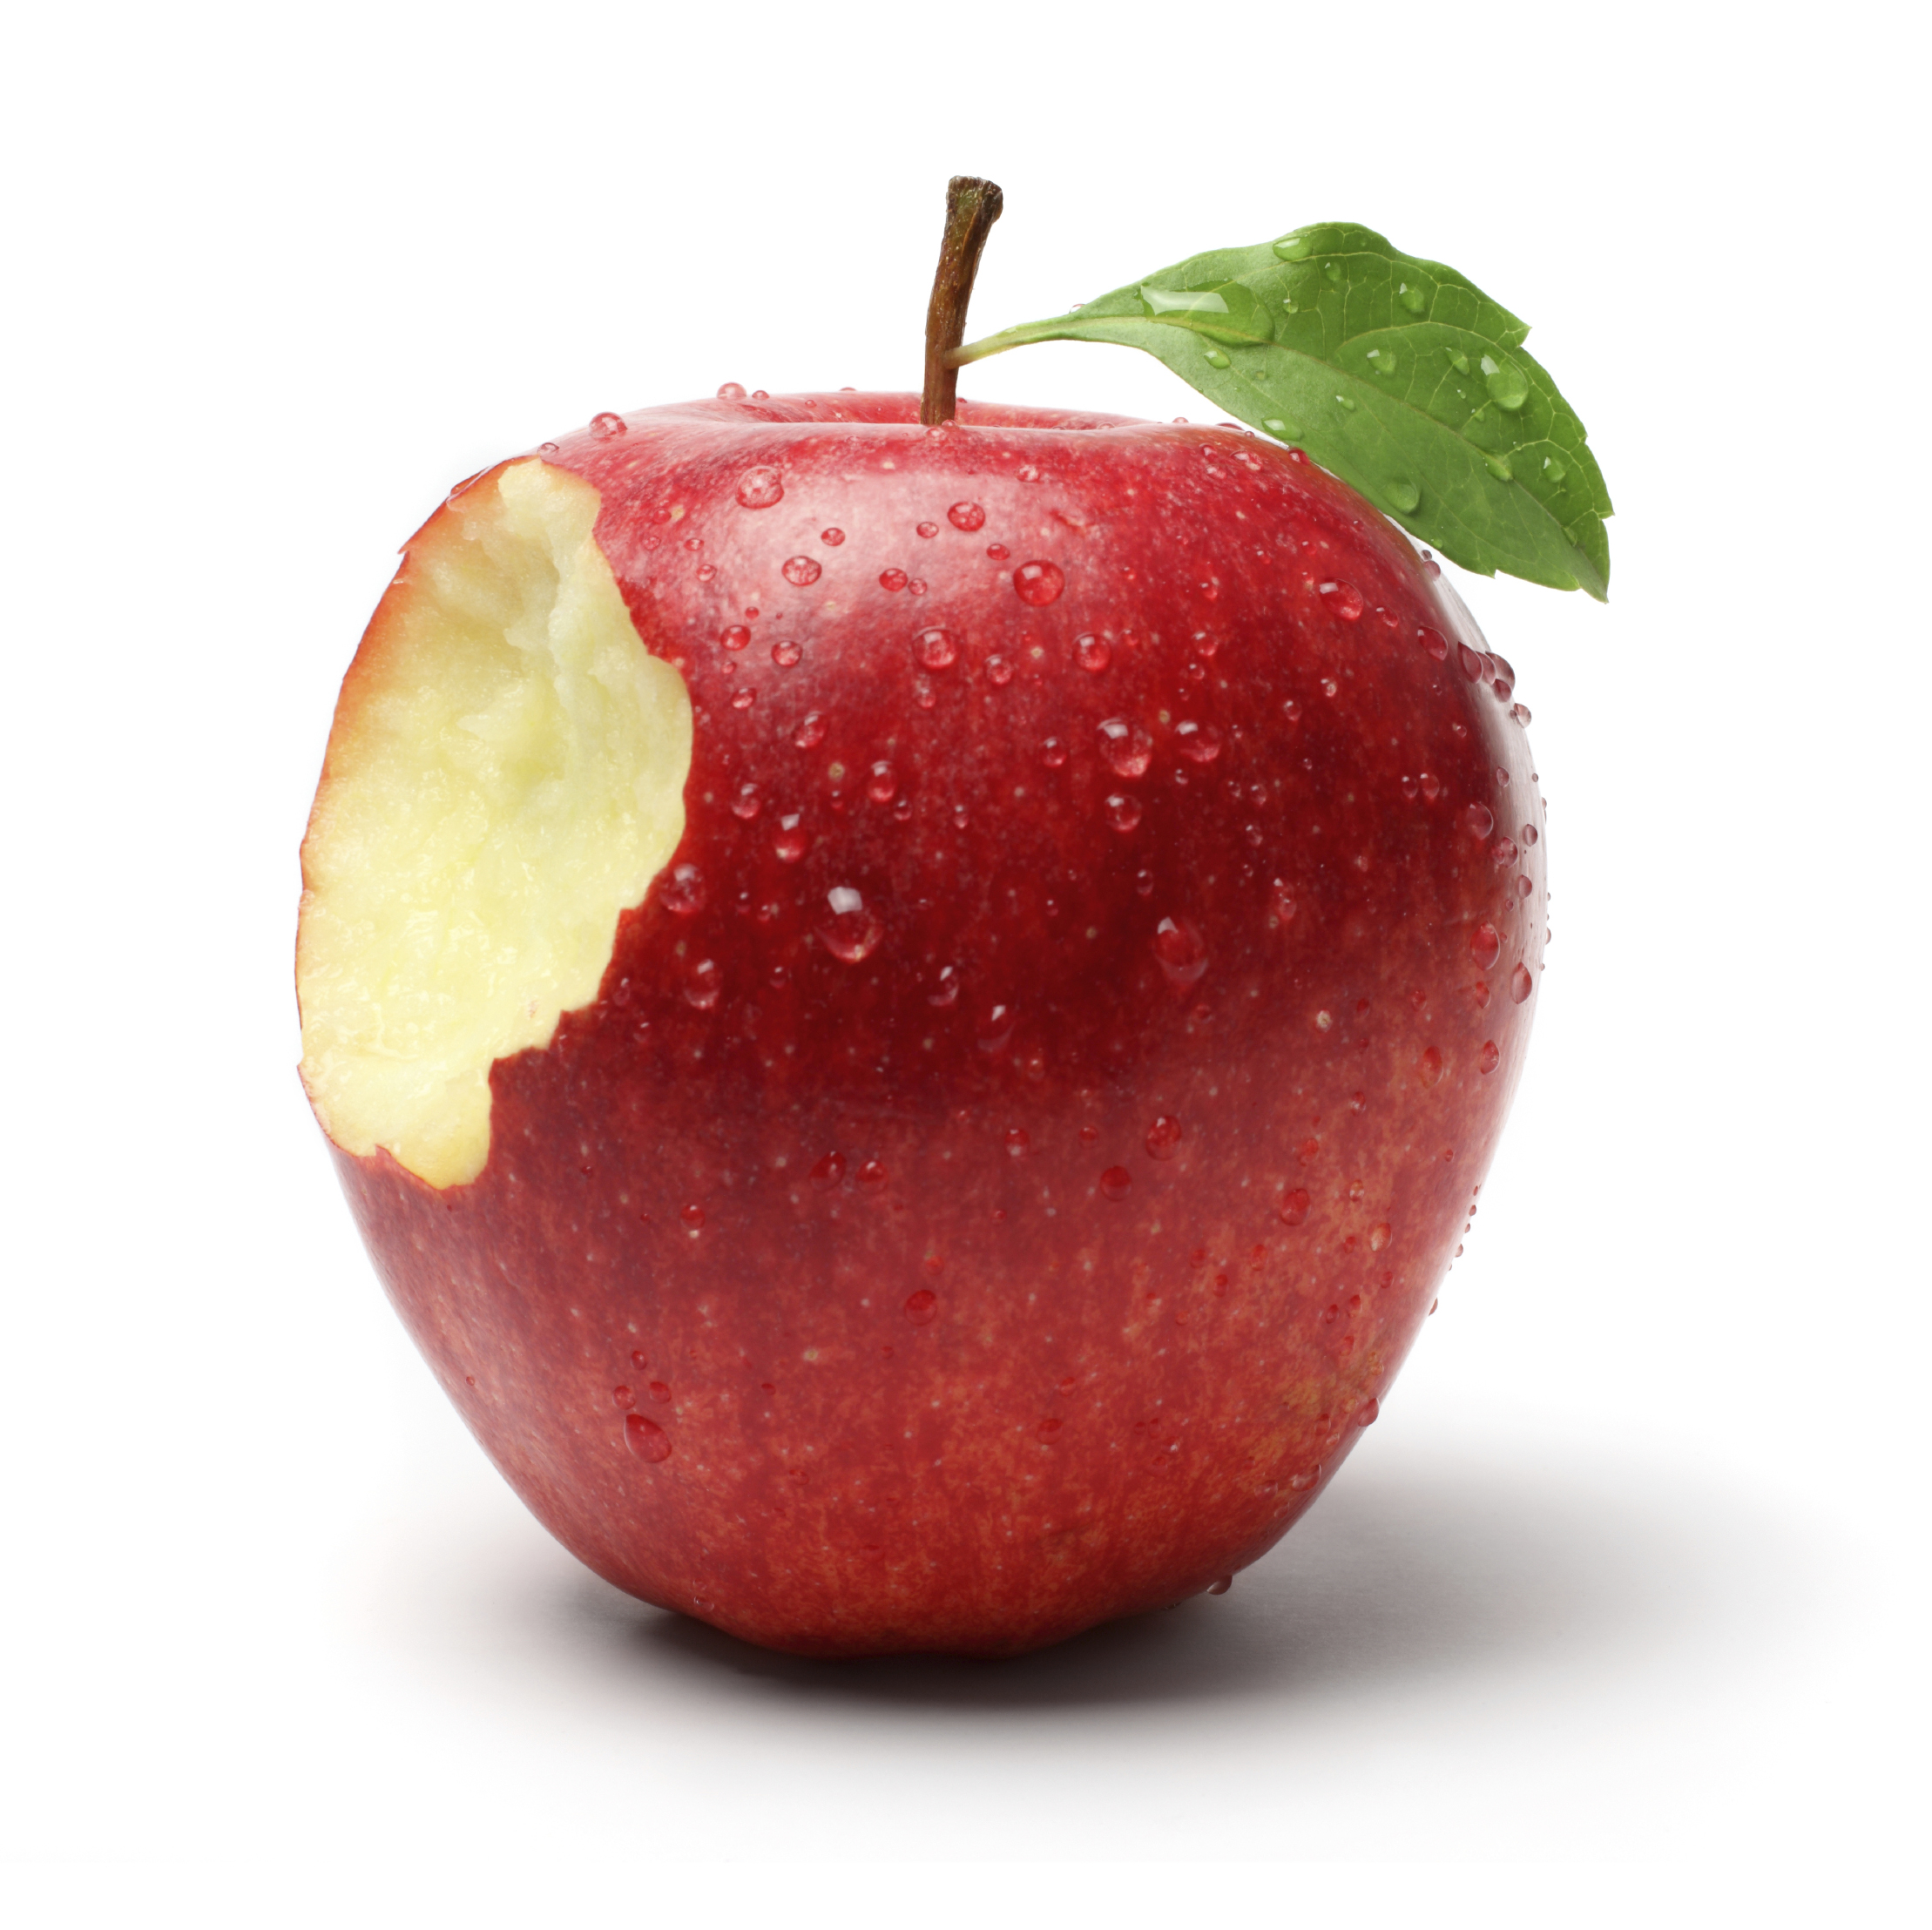

In [5]:
data_path = "{}/Initial_ingredients".format(os.getcwd())
item = "apple"
n = 1
PIL.Image.open("{path}/{item}/Image_{n}.jpg".format(path = data_path, item = item, n = n))

In [6]:
# Batch_size defines the number of samples that will be propagated through the network.
# https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
batch_size = 32
# The size to which the images will be resized when loaded
img_height = 256
img_width = 256

Now, we will use these parameters to load the data

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    labels = "inferred",
    validation_split = 0.2, # 20% of the data will be used for validation
    subset="training",
    color_mode = "rgb",
    seed = 1,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 525 files belonging to 6 classes.
Using 420 files for training.
Metal device set to: Apple M1
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:

2022-04-26 00:02:35.390463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-26 00:02:35.390807: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
train_ds.class_names

['almond milk', 'apple', 'lettuce', 'onion', 'potato', 'tomato']

And validation data

In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 525 files belonging to 6 classes.
Using 105 files for validation.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalAnd in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op SelectV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in dev

Now we can have a look at the loaded data:

Executing op TakeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


2022-04-26 00:03:00.124444: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:03:00.124461: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:03:00.124466: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:03:00.124471: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:03:00.124474: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:03:00.124478: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:03:00.124483: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

tf.Tensor([4 0 5 2 1 4 0 3 1 5 0 3 0 3 3 4 4 5 1 4 5 2 1 3 1 5 5 3 1 2 5 2], shape=(32,), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op St

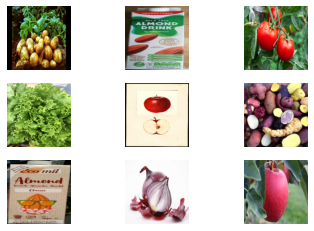

In [10]:
for images, labels in train_ds.take(1):
    print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

The next step is to understand more about data caching:
- Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache. See https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache
- Dataset.prefetch overlaps data preprocessing and model execution while training.
Now, we must combine both of these steps to 

In [11]:
# Cache the data

First, note the difference between normalization and scaling:

> Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Next step is normalizing the data. 

In [12]:
normalization_layer = layers.BatchNormalization() # Will be used as part of the model definition
# another way to normalize:
# layers.Rescaling(1./255, (img_height, img_width, 3))

In [13]:
#Other useful layers
maxPool = layers.MaxPooling2D()

In [14]:
tf.config.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

In [23]:
import numpy as np
import tensorflow as tf
X = np.arange(1, 101, step=0.1)
y = [x + 10 for x in X]

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

'''
other_layer = layers.Dense(1, input_shape=(img_height, img_width, 3), activation='relu')

with tf.device('/CPU:0'):
    contrast = layers.RandomContrast(factor=0.75)

model = tf.keras.Sequential([contrast, other_layer])
'''


def get_compiled_model():
    # Make a simple 2-layer densely-connected neural network.
    inputs = keras.Input(shape=(img_height, img_width, 3))
    with tf.device("/CPU:0"):
        x = layers.RandomContrast(factor=0.75)(inputs)
    with tf.device("/GPU:0"):
        outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    model.compile(
        loss=tf.keras.losses.mean_absolute_error,
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
        metrics=['mean_absolute_error']
    )
    return model

model = get_compiled_model()

# Train the model on all available devices.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Maximum in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ConcatV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device

2022-04-26 00:48:15.633502: I tensorflow/core/common_runtime/placer.cc:114] iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:15.633513: I tensorflow/core/common_runtime/placer.cc:114] iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:15.633516: I tensorflow/core/common_runtime/placer.cc:114] model_1_random_contrast_6_stateful_uniform_full_int_rngreadandskip_resource: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:15.633518: I tensorflow/core/common_runtime/placer.cc:114] model_1_dense_6_tensordot_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-04-26 00:48:15.633520: I tensorflow/core/common_runtime/placer.cc:114] model_1_dense_6_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-04-26 00:48:15.633522: I tensorflow/core/common_runtime/placer.cc:114] assignaddvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU

 1/14 [=>............................] - ETA: 33s - loss: 89.2414 - mean_absolute_error: 89.2414Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 5s - loss: 68.9873 - mean_absolute_error: 68.9873 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 4s - loss: 50.7037 - mean_absolute_error: 50.7037Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_fu

2022-04-26 00:48:20.944723: I tensorflow/core/common_runtime/placer.cc:114] iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:20.944742: I tensorflow/core/common_runtime/placer.cc:114] iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:20.944744: I tensorflow/core/common_runtime/placer.cc:114] model_1_dense_6_tensordot_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-04-26 00:48:20.944746: I tensorflow/core/common_runtime/placer.cc:114] model_1_dense_6_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-04-26 00:48:20.944748: I tensorflow/core/common_runtime/placer.cc:114] assignaddvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-04-26 00:48:20.944753: I tensorflow/core/common_runtime/placer.cc:114] assignaddvariableop_1_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-04-26 00:48:20.944754: I tensorflow/c

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 7s 314ms/step - loss: 28.2773 - mean_absolute_error: 28.2773 - val_loss: 20.6050 - val_mean_absolut

2022-04-26 00:48:22.118711: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:22.118729: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:22.118732: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:22.118735: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:22.118737: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:22.118739: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:22.118741: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 28s - loss: 22.7064 - mean_absolute_error: 22.7064Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 3s - loss: 19.2041 - mean_absolute_error: 19.2041 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 3s - loss: 16.7624 - mean_absolute_error: 16.7624Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_fu

2022-04-26 00:48:26.656024: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:26.656037: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:26.656039: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:26.656045: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:26.656048: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:26.656050: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:26.656053: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 5s 241ms/step - loss: 10.3106 - mean_absolute_error: 10.3106 - val_loss: 5.9013 - val_mean_absolute

2022-04-26 00:48:27.445223: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:27.445235: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:27.445238: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:27.445240: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:27.445243: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:27.445245: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:27.445247: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 23s - loss: 6.3261 - mean_absolute_error: 6.3261Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 3s - loss: 7.9617 - mean_absolute_error: 7.9617 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 3s - loss: 7.6748 - mean_absolute_error: 7.6748Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:48:31.792597: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:31.792611: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:31.792613: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:31.792616: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:31.792619: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:31.792621: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:31.792623: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 5s 268ms/step - loss: 5.3511 - mean_absolute_error: 5.3511 - val_loss: 1.7560 - val_mean_absolute_e

2022-04-26 00:48:32.729870: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:32.729885: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:32.729887: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:32.729890: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:32.729892: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:32.729894: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:32.729896: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 30s - loss: 1.9025 - mean_absolute_error: 1.9025Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 4s - loss: 2.2887 - mean_absolute_error: 2.2887 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 3s - loss: 2.1598 - mean_absolute_error: 2.1598Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:48:37.711991: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:37.712004: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:37.712007: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:37.712010: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:37.712012: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:37.712015: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:37.712017: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 6s 267ms/step - loss: 2.3170 - mean_absolute_error: 2.3170 - val_loss: 1.7784 - val_mean_absolute_e

2022-04-26 00:48:38.568481: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:38.568496: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:38.568498: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:38.568501: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:38.568504: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:38.568509: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:38.568511: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 27s - loss: 1.5675 - mean_absolute_error: 1.5675Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 3s - loss: 1.6656 - mean_absolute_error: 1.6656 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 3s - loss: 1.6457 - mean_absolute_error: 1.6457Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:48:43.165743: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.165758: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.165761: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.165764: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.165766: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.165769: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.165771: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 5s 252ms/step - loss: 2.5599 - mean_absolute_error: 2.5599 - val_loss: 4.6222 - val_mean_absolute_e

2022-04-26 00:48:43.956393: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.956407: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.956409: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.956412: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.956414: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.956416: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:43.956418: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 32s - loss: 4.4919 - mean_absolute_error: 4.4919Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 5s - loss: 4.1273 - mean_absolute_error: 4.1273 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 4s - loss: 3.8754 - mean_absolute_error: 3.8754Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:48:49.255385: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:49.255398: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:49.255409: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:49.255415: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:49.255417: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:49.255420: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:49.255422: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 6s 281ms/step - loss: 3.4134 - mean_absolute_error: 3.4134 - val_loss: 4.3044 - val_mean_absolute_e

2022-04-26 00:48:50.136470: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:50.136486: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:50.136489: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:50.136497: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:50.136500: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:50.136502: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:50.136505: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 25s - loss: 4.5707 - mean_absolute_error: 4.5707Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 3s - loss: 3.5761 - mean_absolute_error: 3.5761 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 3s - loss: 3.4706 - mean_absolute_error: 3.4706Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:48:54.587039: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:54.587054: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:54.587057: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:54.587059: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:54.587062: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:54.587064: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:54.587067: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 5s 253ms/step - loss: 2.8403 - mean_absolute_error: 2.8403 - val_loss: 1.7004 - val_mean_absolute_e

2022-04-26 00:48:55.401258: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:55.401274: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:55.401277: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:55.401285: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:55.401288: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:55.401290: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:48:55.401292: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 24s - loss: 1.6820 - mean_absolute_error: 1.6820Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 4s - loss: 1.6185 - mean_absolute_error: 1.6185 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 4s - loss: 1.6452 - mean_absolute_error: 1.6452Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:49:00.034570: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.034586: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.034605: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.034610: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.034613: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.034615: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.034617: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 5s 271ms/step - loss: 1.6674 - mean_absolute_error: 1.6674 - val_loss: 4.5830 - val_mean_absolute_e

2022-04-26 00:49:00.856769: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.856787: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.856790: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.856793: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.856795: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.856797: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:00.856799: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 32s - loss: 5.2263 - mean_absolute_error: 5.2263Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 3s - loss: 3.5932 - mean_absolute_error: 3.5932 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 3s - loss: 4.0676 - mean_absolute_error: 4.0676Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:49:05.789443: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:05.789458: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:05.789480: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:05.789486: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:05.789489: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:05.789492: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:05.789494: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 6s 252ms/step - loss: 5.3289 - mean_absolute_error: 5.3289 - val_loss: 1.4673 - val_mean_absolute_e

2022-04-26 00:49:06.620464: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:06.620479: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:06.620481: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:06.620491: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:06.620493: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:06.620495: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:06.620498: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

 1/14 [=>............................] - ETA: 29s - loss: 1.5259 - mean_absolute_error: 1.5259Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/14 [===>..........................] - ETA: 4s - loss: 2.8856 - mean_absolute_error: 2.8856 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_5964 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/14 [=====>........................] - ETA: 4s - loss: 2.8821 - mean_absolute_error: 2.8821Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

2022-04-26 00:49:11.572460: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:11.572474: I tensorflow/core/common_runtime/placer.cc:114] ReadFile: (ReadFile): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:11.572485: I tensorflow/core/common_runtime/placer.cc:114] decode_image/DecodeImage: (DecodeImage): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:11.572491: I tensorflow/core/common_runtime/placer.cc:114] resize/ExpandDims: (ExpandDims): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:11.572493: I tensorflow/core/common_runtime/placer.cc:114] resize/ResizeBilinear: (ResizeBilinear): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:11.572496: I tensorflow/core/common_runtime/placer.cc:114] resize/Squeeze: (Squeeze): /job:localhost/replica:0/task:0/device:CPU:0
2022-04-26 00:49:11.572498: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identit

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_6137 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
14/14 [==============================] - 6s 269ms/step - loss: 2.6568 - mean_absolute_error: 2.6568 - val_loss: 1.5735 - val_mean_absolute_e

Now, writing the model. I will test two types of models: one with a pretrained base and another with a smaller custom base

In [52]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


2022-04-25 20:29:47.178417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 1.9210 - accuracy: 0.3143

2022-04-25 20:29:51.411211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 5s 219ms/step - loss: 1.9210 - accuracy: 0.3143 - val_loss: 1.4694 - val_accuracy: 0.3524
Epoch 2/10
14/14 [==============================] - 4s 209ms/step - loss: 1.2779 - accuracy: 0.5333 - val_loss: 1.4274 - val_accuracy: 0.5714
Epoch 3/10
10/14 [====================>.........] - ETA: 0s - loss: 1.1169 - accuracy: 0.5406

KeyboardInterrupt: 

In [13]:
pretrained_base = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(img_height,img_width, 3),
    pooling="MAX"
)
pretrained_base.trainable = False

In [19]:
model_pretrainedBase = keras.Sequential([
    #Data augmentation
    layers.RandomContrast(factor=0.75),
    layers.RandomRotation(factor=0.10),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.1),
    
    #Base
    pretrained_base,
    
    #Head
    layers.Flatten(),
    layers.Dense(6, activation = "relu"),
    layers.Dense(6)
])

In [13]:
model_smallerBase = keras.Sequential([
    #Data augmentation
    layers.RandomContrast(factor=0.75),
    layers.RandomRotation(factor=0.10),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.1),
    
    #First block
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    #Second block
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    #Third block
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    #Head
    layers.Flatten(),
    layers.Dense(6, activation = "relu"),
    layers.Dense(6)
    
])

model_smallerBase.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_smallerBase.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1,
)

Epoch 1/10


InvalidArgumentError: Cannot assign a device for operation sequential/random_contrast/stateful_uniform_full_int/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node sequential/random_contrast/stateful_uniform_full_int/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_random_contrast_stateful_uniform_full_int_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential/random_contrast/stateful_uniform_full_int/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node sequential/random_contrast/stateful_uniform_full_int/RngReadAndSkip}}]] [Op:__inference_train_function_2795]

In [25]:

model_pretrainedBase.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model_pretrainedBase.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1,
)

Epoch 1/10
14/14 [==============================] - 228s 16s/step - loss: 2.6178 - accuracy: 0.2405 - val_loss: 1.7560 - val_accuracy: 0.2286
Epoch 2/10


2022-04-21 22:53:53.059105: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 74 of 256
2022-04-21 22:53:53.059178: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 75 of 256
2022-04-21 22:53:53.059195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 76 of 256
2022-04-21 22:53:53.059208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 77 of 256
2022-04-21 22:53:53.059896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 78 of 256
2022-04-21 22:53:53.802687: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 79 of 256
2022-04-21 22:53:53.804209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this 

2022-04-21 22:53:56.094668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 140 of 256
2022-04-21 22:53:56.094709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 141 of 256
2022-04-21 22:53:56.324946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 142 of 256
2022-04-21 22:53:56.324982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 143 of 256
2022-04-21 22:53:56.324998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 144 of 256
2022-04-21 22:53:56.505098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 145 of 256
2022-04-21 22:53:56.505132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer 

14/14 [==============================] - 1425s 16s/step - loss: 1.6998 - accuracy: 0.2500 - val_loss: 1.5734 - val_accuracy: 0.3333
Epoch 3/10
14/14 [==============================] - 220s 15s/step - loss: 1.5099 - accuracy: 0.3857 - val_loss: 1.2675 - val_accuracy: 0.4762
Epoch 4/10
14/14 [==============================] - 220s 15s/step - loss: 1.2657 - accuracy: 0.5048 - val_loss: 1.4019 - val_accuracy: 0.4857
Epoch 5/10
14/14 [==============================] - 244s 17s/step - loss: 1.2779 - accuracy: 0.5048 - val_loss: 1.2540 - val_accuracy: 0.4762
Epoch 6/10
14/14 [==============================] - 223s 15s/step - loss: 1.2291 - accuracy: 0.5024 - val_loss: 1.2146 - val_accuracy: 0.4952
Epoch 7/10
14/14 [==============================] - 231s 16s/step - loss: 1.2562 - accuracy: 0.5024 - val_loss: 1.2088 - val_accuracy: 0.4952
Epoch 8/10
14/14 [==============================] - 215s 15s/step - loss: 1.2938 - accuracy: 0.5024 - val_loss: 1.2032 - val_accuracy: 0.4952
Epoch 9/10
14/14

Epoch 1/10
14/14 [==============================] - 85s 5s/step - loss: 10.4438 - accuracy: 0.1643 - val_loss: 1.7919 - val_accuracy: 0.1810
Epoch 2/10
14/14 [==============================] - 81s 5s/step - loss: 1.7918 - accuracy: 0.1929 - val_loss: 1.7913 - val_accuracy: 0.1810
Epoch 3/10
14/14 [==============================] - 77s 5s/step - loss: 1.7909 - accuracy: 0.1929 - val_loss: 1.7907 - val_accuracy: 0.1810
Epoch 4/10
14/14 [==============================] - 99s 7s/step - loss: 1.7901 - accuracy: 0.1929 - val_loss: 1.7900 - val_accuracy: 0.1810
Epoch 5/10
14/14 [==============================] - 89s 6s/step - loss: 1.7891 - accuracy: 0.1929 - val_loss: 1.7893 - val_accuracy: 0.1810
Epoch 6/10
14/14 [==============================] - 76s 5s/step - loss: 1.7882 - accuracy: 0.1929 - val_loss: 1.7888 - val_accuracy: 0.1810
Epoch 7/10
14/14 [==============================] - 76s 5s/step - loss: 1.7876 - accuracy: 0.1929 - val_loss: 1.7882 - val_accuracy: 0.1810
Epoch 8/10
14/14 [=